# In this notebook we visualize effects of different parameters in creating flat maps

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import akita_utils.format_io as format_io

# sns.set_theme()

# Importing scores from simulations

In [2]:
def _load_data(h5_dirs,scd_stats):
    dataframes = []
    for h5_file in glob.glob(h5_dirs):
        dataframes.append(akita_utils.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None))
    new_dataframe = pd.concat(dataframes)
    for stat in scd_stats:
        new_dataframe[f"mean_{stat}_score"] = (new_dataframe[f"{stat}_h1_m1_t0"]+new_dataframe[f"{stat}_h1_m1_t1"]+new_dataframe[f"{stat}_h1_m1_t2"]+new_dataframe[f"{stat}_h1_m1_t3"]+new_dataframe[f"{stat}_h1_m1_t4"]+new_dataframe[f"{stat}_h1_m1_t5"])/6
    new_dataframe.reset_index(drop=True, inplace=True)
    return new_dataframe

scd_stats = ["SCD","MPS","CS"]
h5_dirs = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_1/*/*.h5" 

dfs = _load_data(h5_dirs,scd_stats)

In [3]:
# dfs["mean_SCD_score"] = (dfs["SCD_h1_m1_t0"]+dfs["SCD_h1_m1_t1"]+dfs["SCD_h1_m1_t2"]+dfs["SCD_h1_m1_t3"]+dfs["SCD_h1_m1_t4"]+dfs["SCD_h1_m1_t5"])/6
# dfs["mean_MPS_score"] = (dfs["MPS_h1_m1_t0"]+dfs["MPS_h1_m1_t1"]+dfs["MPS_h1_m1_t2"]+dfs["MPS_h1_m1_t3"]+dfs["MPS_h1_m1_t4"]+dfs["MPS_h1_m1_t5"])/6
# dfs["mean_CS_score"] = (dfs["CS_h1_m1_t0"]+dfs["CS_h1_m1_t1"]+dfs["CS_h1_m1_t2"]+dfs["CS_h1_m1_t3"]+dfs["CS_h1_m1_t4"]+dfs["CS_h1_m1_t5"])/6

# General scores distribution

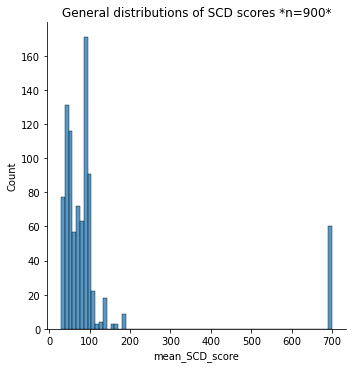

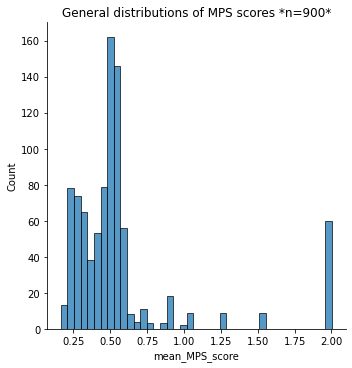

In [4]:
dfs.reset_index(drop=True, inplace=True)
sns.displot(dfs, x="mean_SCD_score")
plt.title(f"General distributions of SCD scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

sns.displot(dfs, x="mean_MPS_score")
plt.title(f"General distributions of MPS scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

# sns.displot(dfs, x="mean_CS_score")
# plt.title(f"General distributions of CS scores *n={dfs.shape[0]}*")
# plt.show()
# plt.close()

# shuffle parameter effect exploration

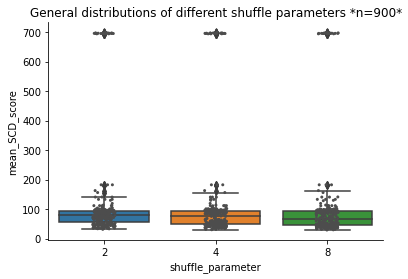

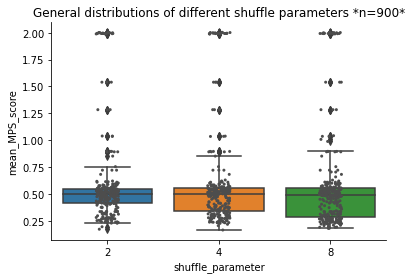

In [5]:
for map_score in ["mean_SCD_score","mean_MPS_score"]: #,"mean_CS_score"
    sns.color_palette("tab10")
    # sns.kdeplot(data=dfs, x=map_score, hue="shuffle_parameter", bw_adjust=.001, fill=True)
    # plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    # plt.xlim([0,100])
    # sns.despine(top = True, right = True)
    # plt.show()
    sns.boxplot(data=dfs, x='shuffle_parameter', y=map_score)
    sns.stripplot(x="shuffle_parameter", y=map_score, data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
#     for score in [2,4,8]:
#         df_dummy_parameter = dfs.loc[dfs["shuffle_parameter"]==score]
#         plt.figure(figsize=(10,5)) # ,dpi=200
#         ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y=map_score)
#         ax.tick_params(axis='x', labelrotation=45)
#         sns.stripplot(x="mutation_method", y=map_score, data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#         plt.title(f"Disecting shuffling by {score} basepairs *n={df_dummy_parameter.shape[0]}*")
#         sns.despine(top = True, right = True)
        
#         plt.show()
#         plt.close()

# map threshold effect exploration

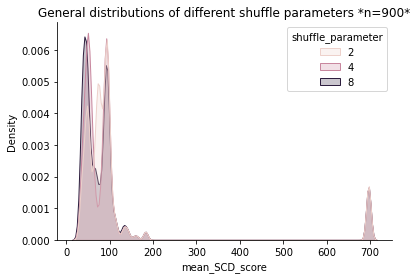

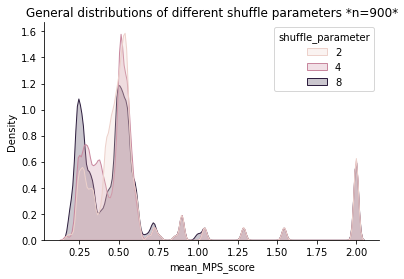

In [19]:
for score in ["mean_SCD_score","mean_MPS_score"]: #,"mean_CS_score"
    sns.kdeplot(data=dfs, x= score, hue="shuffle_parameter", bw_adjust=.1, fill=True)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

    # plt.figure(figsize=(12,5))
    # ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    # ax.tick_params(axis='x', labelrotation=45)
    # sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    # plt.title(f"Disecting {score} as map score threshold *n={df_dummy_parameter.shape[0]}*")
    # sns.despine(top = True, right = True)
    # plt.show()
    # plt.close()

# ctcf selection threshold effect exploration

In [7]:
# sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_selection_threshold", bw_adjust=.3, fill=True)
# sns.despine(top = True, right = True)
# plt.show()
# sns.boxplot(data=dfs, x='ctcf_selection_threshold', y="mean_SCD_score")
# sns.stripplot(x="ctcf_selection_threshold", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
# plt.title(f"General distributions of different ctcf selection thresholds *n={dfs.shape[0]}* \n")
# sns.despine(top = True, right = True)
# plt.show()

# for score in [4,8,12]:
#     df_dummy_parameter = dfs.loc[dfs["ctcf_selection_threshold"]==score]
#     plt.figure(figsize=(10,5))
#     ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
#     ax.tick_params(axis='x', labelrotation=45)
#     sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#     plt.title(f"Disecting {score} as ctcf selection threshold *n={df_dummy_parameter.shape[0]}* \n")
#     sns.despine(top = True, right = True)
#     plt.show()
#     plt.close()

# mutation method effect exploration

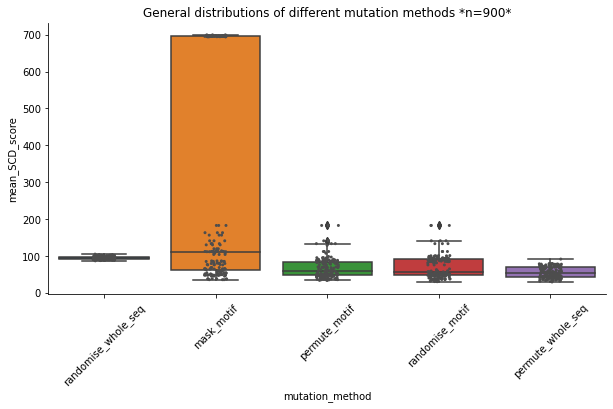

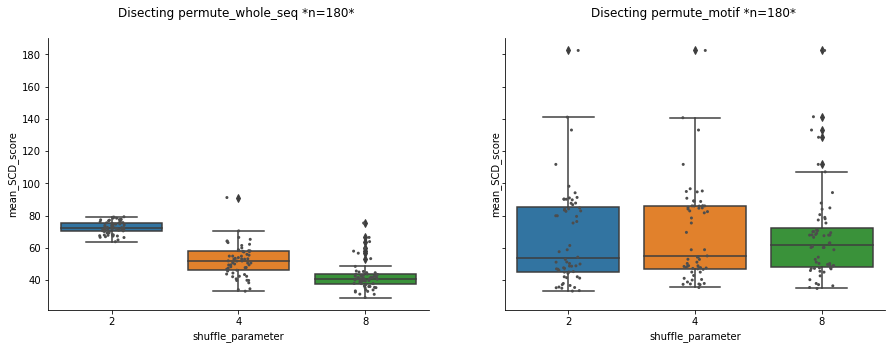

In [16]:
# sns.kdeplot(data=dfs, x="mean_SCD_score", hue="mutation_method", bw_adjust=.3, fill=True)
# plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}* \n")
# sns.despine(top = True, right = True)
# plt.show()

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=dfs, x='mutation_method', y="mean_SCD_score")
ax.tick_params(axis='x', labelrotation=45)
sns.stripplot(x="mutation_method", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
plt.close()

fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=True)
for score_num,score in enumerate(['permute_whole_seq','permute_motif']): # ,'mask_motif','randomise_motif','randomise_whole_seq','mask_motif'
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.boxplot(ax=axes[score_num], data=df_dummy_parameter, x='shuffle_parameter', y="mean_SCD_score")
    sns.stripplot(ax=axes[score_num], x="shuffle_parameter", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    ax=axes[score_num].set_title(f"Disecting {score} *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    # plt.show()
    # plt.close()

# GC content effect exploration

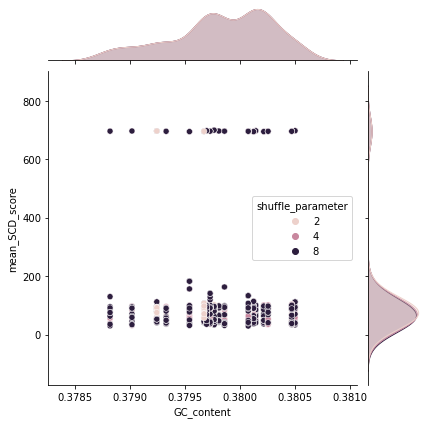

In [9]:
sns.jointplot(data=dfs, y=f"mean_SCD_score", x = "GC_content", hue="shuffle_parameter") #

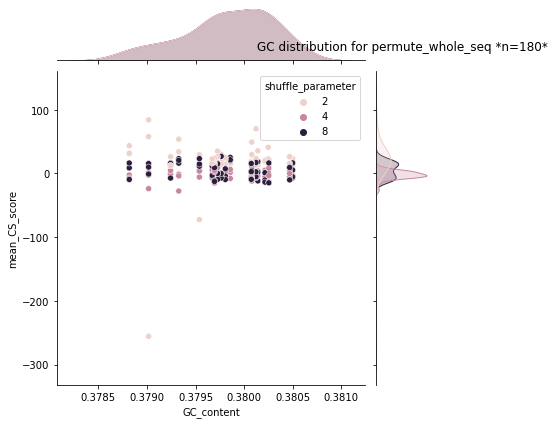

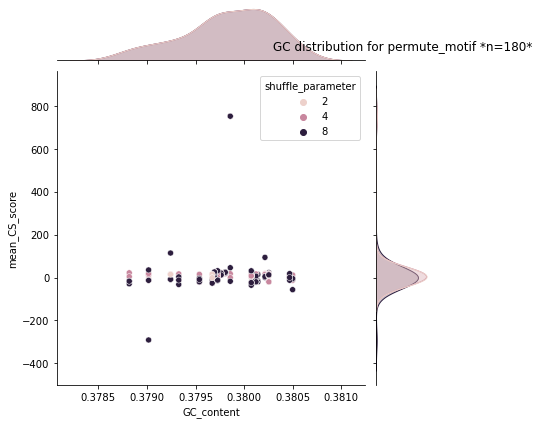

In [17]:
for score in ['permute_whole_seq','permute_motif']: #'randomise_whole_seq','mask_motif',,'randomise_motif'
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.jointplot(data=df_dummy_parameter, y=f"mean_CS_score", x = "GC_content", hue="shuffle_parameter", color=".3")
    plt.title(f"GC distribution for {score} *n={df_dummy_parameter.shape[0]}*\n")